<a href="https://colab.research.google.com/github/AliShujjat/DropOutRatesInPakistan/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Retrieving the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Edu/Edu4.csv" "Edu4.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
import math as math
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data
data = pd.read_csv('Edu4.csv')
data.head()

,Unnamed: 0,"If Drop-out, studied up-to which class",Edu status,Age of Child,Reasons for dropout,English Reading Level,Age of father (completed years),Reading in local language,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,Male members of household,Female members of household,Gender,Is bonus math question 1 attempted correctly?,Unique ID of government school,Name of the District,Total children present on day of visit,Year of school establishment,Local Language of the Village,Total number of enrolled children,Availability of Motorcycles/Bikes,Economic Profile,Total number of government schools in surveyed village,Is electricity available at school?,Type of Household,Currently Enrolled: Institution type,Name of Province/Territory,Current Class-Grade of Child
0,0,5,Never Enrolled,3.0,Poverty,Beginner,40.0,Story,36.0,Division,4.0,5.0,1.0,male,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Poor,2.0,0.0,pucca,Government,Azad Jammu and Kashmir,2
1,1,5,Currently Enrolled,5.0,Poverty,Words,35.0,Words,30.0,Division,2.0,2.0,2.0,female,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Rich,2.0,0.0,Semi pucca,Government,Azad Jammu and Kashmir,2
2,2,5,Currently Enrolled,5.0,Poverty,Small letters,70.0,Letters,65.0,Recognition of 10-99,3.0,6.0,3.0,female,0.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Rich,2.0,0.0,Semi pucca,Government,Azad Jammu and Kashmir,Nursery
3,3,5,Currently Enrolled,10.0,Poverty,NaN,50.0,Story,45.0,Division,3.0,2.0,3.0,male,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,1.0,Richest,2.0,0.0,Semi pucca,Government,Azad Jammu and Kashmir,3
4,4,5,Currently Enrolled,4.0,Poverty,Beginner,40.0,Story,30.0,Division,3.0,3.0,2.0,male,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,Poor,2.0,0.0,pucca,Private,Azad Jammu and Kashmir,Nursery


In [4]:
#Dimensions
data.shape

(260186, 29)

In [5]:
#Data types
data.dtypes

Unnamed: 0                                                       int64
If Drop-out, studied up-to which class                          object
Edu status                                                      object
Age of Child                                                   float64
Reasons for dropout                                             object
English Reading Level                                           object
Age of father (completed years)                                float64
Reading in local language                                       object
Age of mother (completed years)                                float64
Arithmetic Levels                                               object
Total number of surviving children (LESS THAN 17) of mother    float64
Male members of household                                      float64
Female members of household                                    float64
Gender                                                          object
Is bon

In [6]:
data.isnull().sum(axis = 0)
#WE HAVE NULLS

Unnamed: 0                                                         0
If Drop-out, studied up-to which class                             0
Edu status                                                         0
Age of Child                                                       0
Reasons for dropout                                                0
English Reading Level                                          49360
Age of father (completed years)                                    0
Reading in local language                                          0
Age of mother (completed years)                                    0
Arithmetic Levels                                                  0
Total number of surviving children (LESS THAN 17) of mother        0
Male members of household                                          0
Female members of household                                        0
Gender                                                             0
Is bonus math question 1 attempted

In [7]:
#Replace nulls with mode
data['English Reading Level'].fillna(data['English Reading Level'].mode()[0], inplace=True)
data.isnull().sum(axis = 0)

Unnamed: 0                                                     0
If Drop-out, studied up-to which class                         0
Edu status                                                     0
Age of Child                                                   0
Reasons for dropout                                            0
English Reading Level                                          0
Age of father (completed years)                                0
Reading in local language                                      0
Age of mother (completed years)                                0
Arithmetic Levels                                              0
Total number of surviving children (LESS THAN 17) of mother    0
Male members of household                                      0
Female members of household                                    0
Gender                                                         0
Is bonus math question 1 attempted correctly?                  0
Unique ID of government s

In [8]:
data.nunique()

Unnamed: 0                                                     260186
If Drop-out, studied up-to which class                             30
Edu status                                                          3
Age of Child                                                       14
Reasons for dropout                                                 7
English Reading Level                                               4
Age of father (completed years)                                    72
Reading in local language                                           5
Age of mother (completed years)                                    65
Arithmetic Levels                                                   6
Total number of surviving children (LESS THAN 17) of mother        16
Male members of household                                          28
Female members of household                                        21
Gender                                                              2
Is bonus math questi

In [9]:
#Stats
data.describe(include='all')  

,Unnamed: 0,"If Drop-out, studied up-to which class",Edu status,Age of Child,Reasons for dropout,English Reading Level,Age of father (completed years),Reading in local language,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,Male members of household,Female members of household,Gender,Is bonus math question 1 attempted correctly?,Unique ID of government school,Name of the District,Total children present on day of visit,Year of school establishment,Local Language of the Village,Total number of enrolled children,Availability of Motorcycles/Bikes,Economic Profile,Total number of government schools in surveyed village,Is electricity available at school?,Type of Household,Currently Enrolled: Institution type,Name of Province/Territory,Current Class-Grade of Child
count,260186.000000,260186,260186,260186.000000,260186,260186,260186.000000,260186,260186.000000,260186,260186.000000,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186.000000,260186.000000,260186,260186,260186,260186
unique,NaN,30,3,NaN,7,4,NaN,5,NaN,6,NaN,NaN,NaN,2,NaN,NaN,154,NaN,NaN,295,NaN,NaN,4,NaN,NaN,3,4,8,18
top,NaN,5,Currently Enrolled,NaN,Poverty,Beginner,NaN,Story,NaN,Division,NaN,NaN,NaN,male,NaN,NaN,Panjgur,NaN,NaN,PASHTO,NaN,NaN,Poor,NaN,NaN,kutcha,Government,Balochistan,2
freq,NaN,251196,186805,NaN,253589,173825,NaN,132547,NaN,125860,NaN,NaN,NaN,146910,NaN,NaN,3808,NaN,NaN,128349,NaN,NaN,67392,NaN,NaN,98345,215730,67706,111843
mean,130092.500000,NaN,NaN,8.727061,NaN,NaN,40.869555,NaN,36.144401,NaN,3.519002,3.083075,3.084632,NaN,-0.737038,111052.476194,NaN,160.647079,1987.922709,NaN,189.815482,0.662545,NaN,1.138193,0.633877,NaN,NaN,NaN,NaN
std,75109.372907,NaN,NaN,3.779195,NaN,NaN,8.321908,NaN,7.396435,NaN,1.558213,1.251340,1.147668,NaN,0.440243,11889.175063,NaN,195.974294,11.284562,NaN,214.571726,0.514786,NaN,1.105592,0.481744,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,3.000000,NaN,NaN,20.000000,NaN,17.000000,NaN,0.000000,0.000000,0.000000,NaN,-1.000000,4792.000000,NaN,5.000000,1956.000000,NaN,10.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,65046.250000,NaN,NaN,6.000000,NaN,NaN,35.000000,NaN,30.000000,NaN,3.000000,3.000000,3.000000,NaN,-1.000000,105869.000000,NaN,46.000000,1983.000000,NaN,61.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,130092.500000,NaN,NaN,8.000000,NaN,NaN,40.000000,NaN,36.000000,NaN,3.000000,3.000000,3.000000,NaN,-1.000000,116946.000000,NaN,93.000000,1990.000000,NaN,119.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,195138.750000,NaN,NaN,12.000000,NaN,NaN,45.000000,NaN,40.000000,NaN,4.000000,3.000000,3.000000,NaN,0.000000,118083.000000,NaN,197.000000,1993.000000,NaN,233.000000,1.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [10]:
#Replacing all values in dropout class-grade and class grade with numerics
data.replace({'If Drop-out, studied up-to which class':{'Kachi': 0.0, 'Nursery': 0.2, 'Prep': 0.4, 'PG': 0.6, 'KG': 0.8, 'ECE': 8}}, inplace = True)
data.replace({'Current Class-Grade of Child':{'Kachi': 0.0, 'Nursery': 0.2, 'Prep': 0.4, 'PG': 0.6, 'KG': 0.8, 'ECE': 8}}, inplace = True)

#Convert to float type
data['Current Class-Grade of Child'] = data['Current Class-Grade of Child'].astype(float)
data['If Drop-out, studied up-to which class'] = data['If Drop-out, studied up-to which class'].astype(float)
data['Age of father (completed years)'].replace(347,40.869555,inplace=True)

#Recheck uniques
display(data['If Drop-out, studied up-to which class'].value_counts())
display(data['Current Class-Grade of Child'].value_counts())

5.0     251654
3.0       2135
2.0       1966
4.0       1375
8.0        669
1.0        563
6.0        530
7.0        369
10.0       302
9.0        160
0.6        150
0.0         86
0.8         83
0.4         81
12.0        26
0.2         24
11.0        13
Name: If Drop-out, studied up-to which class, dtype: int64

2.0     111843
3.0      22712
1.0      20160
5.0      17264
4.0      17250
6.0      11346
8.0      11321
7.0       8963
9.0       6669
0.0       6554
0.8       6287
10.0      5976
0.2       4739
0.4       4366
0.6       3179
11.0      1068
12.0       489
Name: Current Class-Grade of Child, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febf922c2b0>,
      dtype=object)

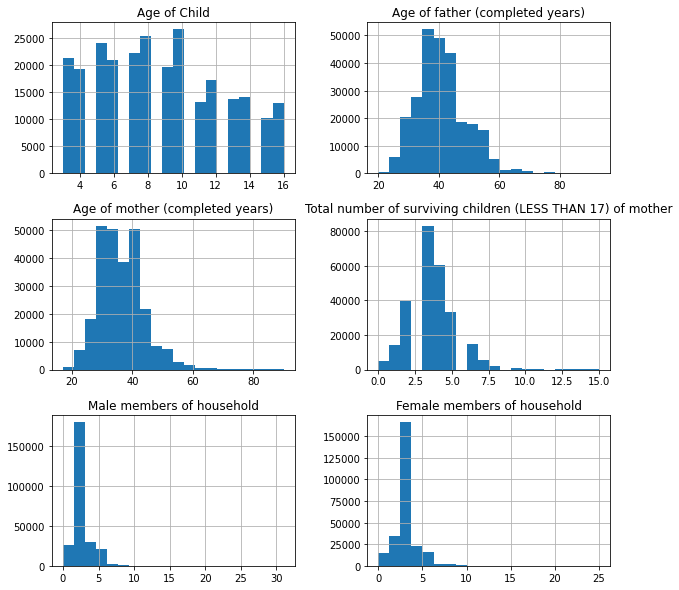

In [11]:
#Visualize distribution of all numeric attributes
data.hist(column=['Age of Child','Age of father (completed years)','Age of mother (completed years)','Total number of surviving children (LESS THAN 17) of mother','Male members of household','Female members of household'], figsize=(10,10), bins=20)

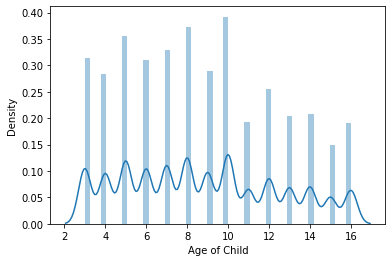

In [12]:
#Distribution of Ages
ax = sns.distplot(data['Age of Child'])

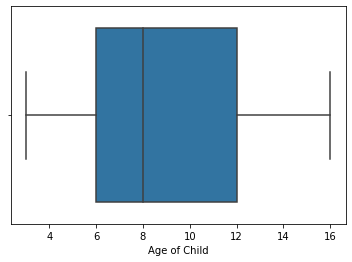

In [13]:
#What ages of children were interviewed
sns.boxplot(data['Age of Child'])
#Data is not symmetric its right skewed

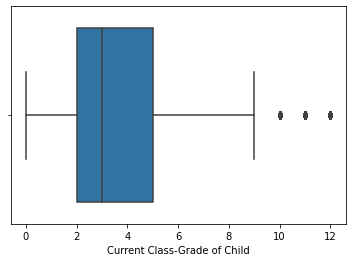

In [14]:
#What Class grades data is available
data['Current Class-Grade of Child'].value_counts()
plt = data[data['Edu status'] == 'Currently Enrolled']
plt['Current Class-Grade of Child'].value_counts()
sns.boxplot(plt['Current Class-Grade of Child'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

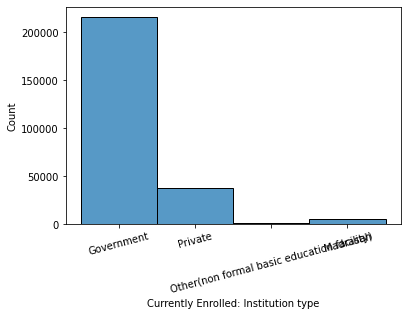

In [15]:
#What type of instituions were visited
plt = data[data['Edu status'] == 'Currently Enrolled']
fig, ax = pyplt.subplots()

# the size of A4 paper
sns.histplot(data=data['Currently Enrolled: Institution type'], ax=ax)
pyplt.xticks(rotation=15)


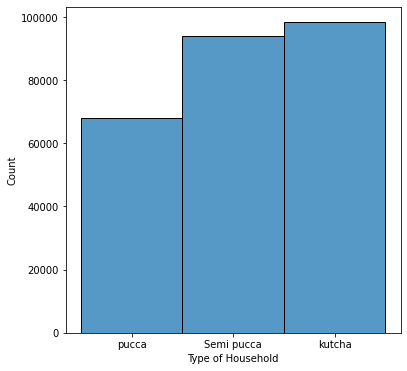

In [16]:
#What type of houswholds were visited

fig, ax = pyplt.subplots()
fig.set_size_inches(6, 6)
sns.histplot(data=data['Type of Household'], ax=ax, binwidth=0.5)

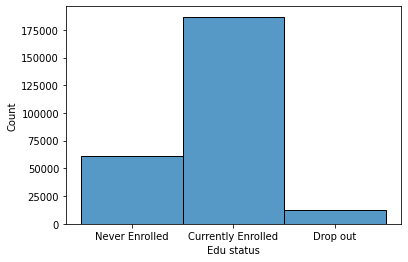

In [17]:
#What is the distrubution of education status like
sns.histplot(data['Edu status'])

,Name of the District
Name of Province/Territory,
Azad Jammu and Kashmir,15848
Balochistan,67706
Gilgit-Baltistan,16828
Islamabad - ICT,1392
Khyber Pakhtunkhwa,42125
Khyber Pakhtunkhwa Merged Region,22312
Punjab,57450
Sindh,36525


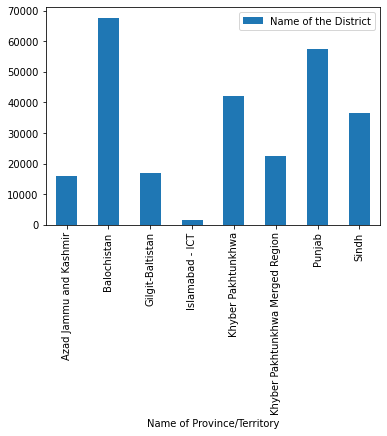

In [18]:
#How many districts per province were included
distInfo = data[['Name of the District', 'Name of Province/Territory']].groupby(['Name of Province/Territory']).count()
display(distInfo)
distInfo.plot(kind = 'bar')

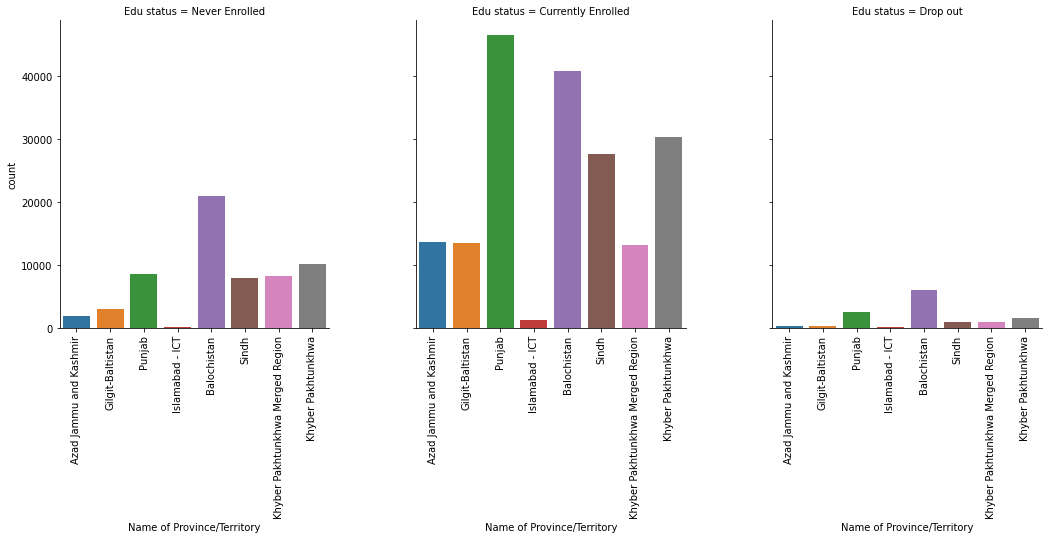

In [19]:
#What provinces have the highest dropouts/enrolled/never enrolled students
g = sns.catplot('Name of Province/Territory', col = 'Edu status',
                data=data[data['Edu status'].notnull()], kind="count", dodge = False, legend = True, hue = 'Name of Province/Territory')
fig.suptitle('sf')
g.set_xticklabels(rotation=90)

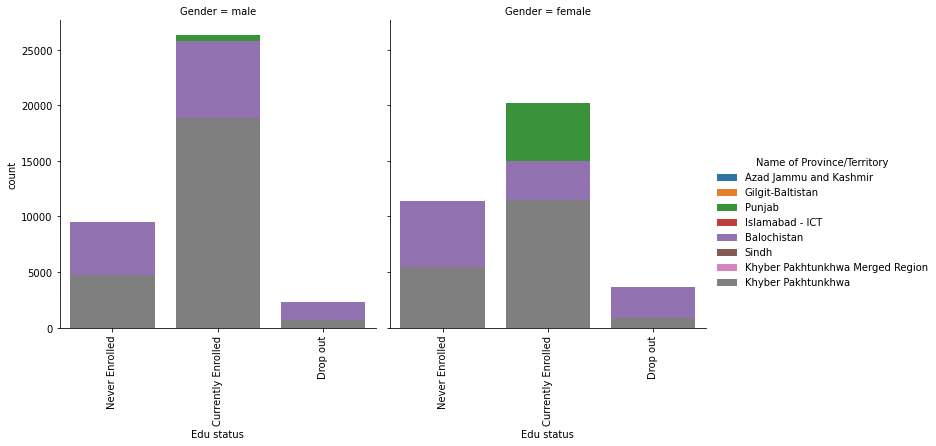

In [20]:
#Province wise education status for difference genders
g = sns.catplot('Edu status', col = 'Gender',
                data=data[data['Gender'].notnull()], kind="count", dodge = False, legend = True, hue = 'Name of Province/Territory')
fig.suptitle('sf')
g.set_xticklabels(rotation=90)

In [21]:
#What genders have the highest dropouts/enrolled/never enrolled students in provinces


Total number of dropouts are 12603
Total number of currently enrolled are 186805
Total number of never enrolled are 60778 

Descriptive Statistics for dropped out ages:  count    12603.000000
mean        12.519162
std          2.948644
min          3.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         16.000000
Name: Age of Child, dtype: float64 

Descriptive Statistics for never enrolled ages  count    60778.000000
mean         5.815114
std          3.589742
min          3.000000
25%          3.000000
50%          4.000000
75%          7.000000
max         16.000000
Name: Age of Child, dtype: float64 

Descriptive Statistics for currently enrolled ages  count    186805.000000
mean          9.418640
std           3.302475
min           3.000000
25%           7.000000
50%           9.000000
75%          12.000000
max          16.000000
Name: Age of Child, dtype: float64 



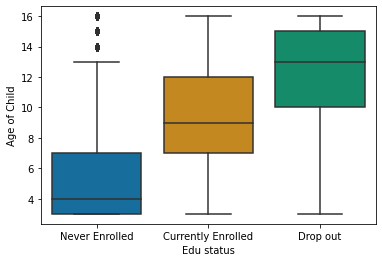

In [22]:
#Age distribution within Edu status
ageCE = data[data['Edu status'] == 'Currently Enrolled']
ageNE = data[data['Edu status'] == 'Never Enrolled']
ageDO = data[data['Edu status'] == 'Drop out']

print('Total number of dropouts are', ageDO['Age of Child'].count())
print('Total number of currently enrolled are', ageCE['Age of Child'].count())
print('Total number of never enrolled are', ageNE['Age of Child'].count(), '\n')

print("Descriptive Statistics for dropped out ages: ", ageDO['Age of Child'].describe(), '\n')
print("Descriptive Statistics for never enrolled ages ", ageNE['Age of Child'].describe(), '\n')
print("Descriptive Statistics for currently enrolled ages ", ageCE['Age of Child'].describe(), '\n')

sns.boxplot(y='Age of Child', x='Edu status',                  data=data,                  palette="colorblind")

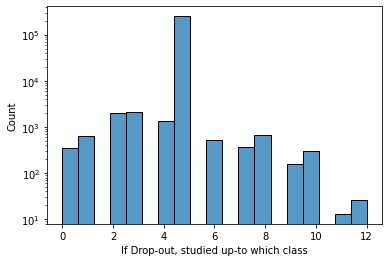

In [23]:
ax = sns.histplot(data['If Drop-out, studied up-to which class'])
ax.set_yscale('log')

Text(0.5, 0.98, 'sf')

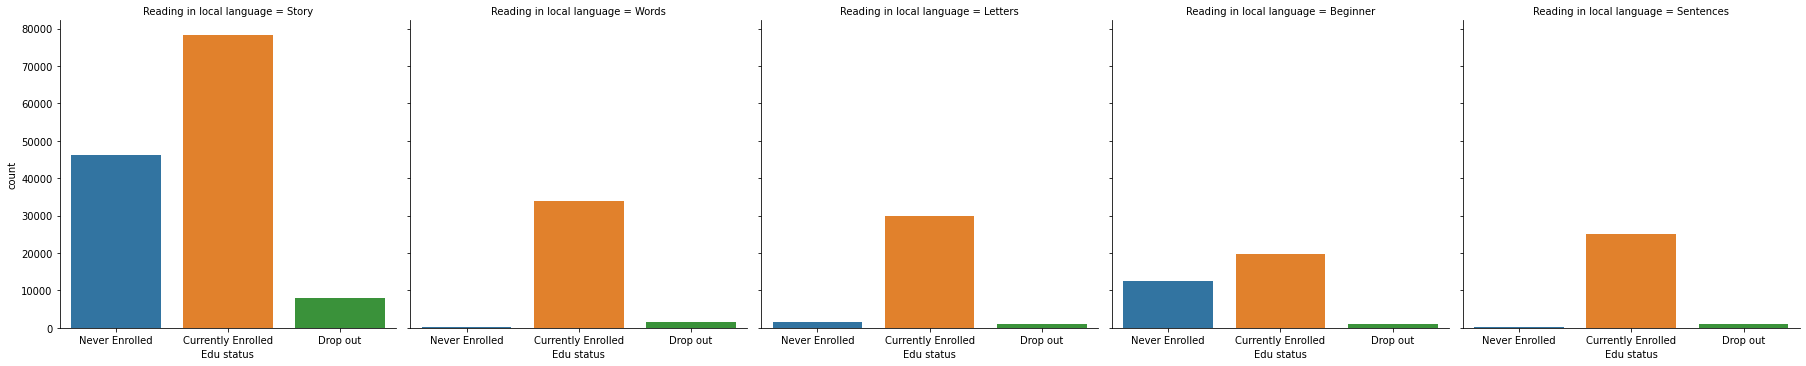

In [24]:
g = sns.catplot('Edu status', col = 'Reading in local language',
                data=data[data['Reading in local language'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

Text(0.5, 0.98, 'sf')

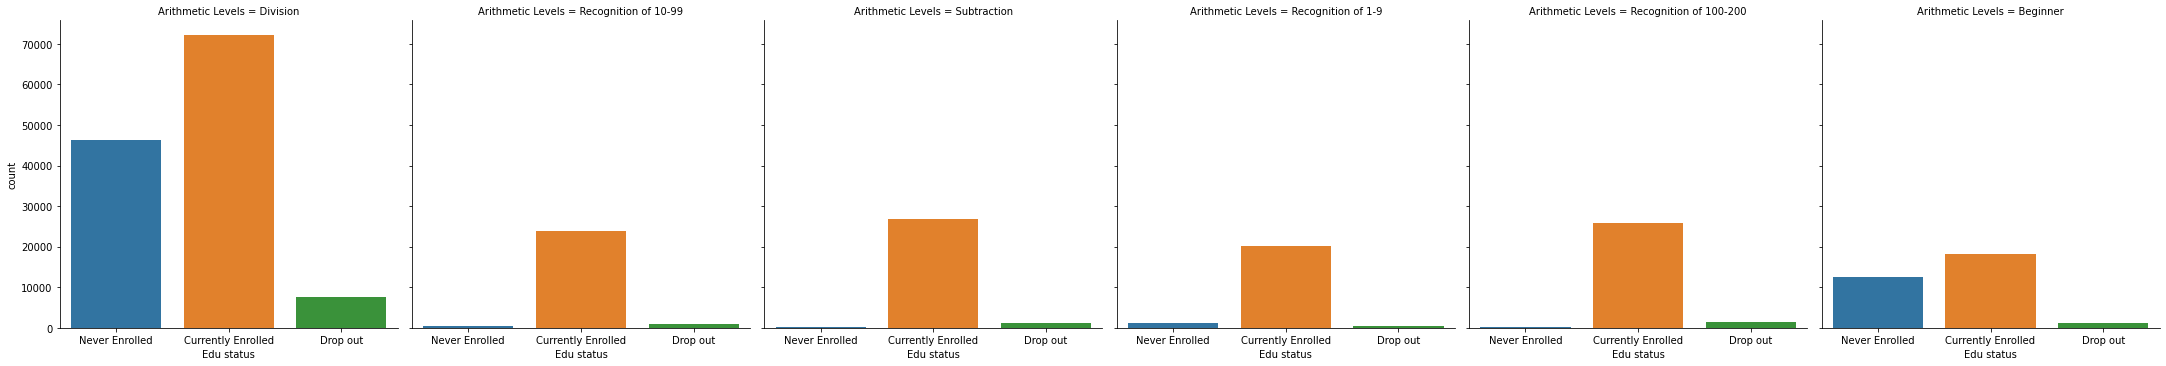

In [25]:
g = sns.catplot('Edu status', col = 'Arithmetic Levels',
                data=data[data['Arithmetic Levels'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

Text(0.5, 0.98, 'sf')

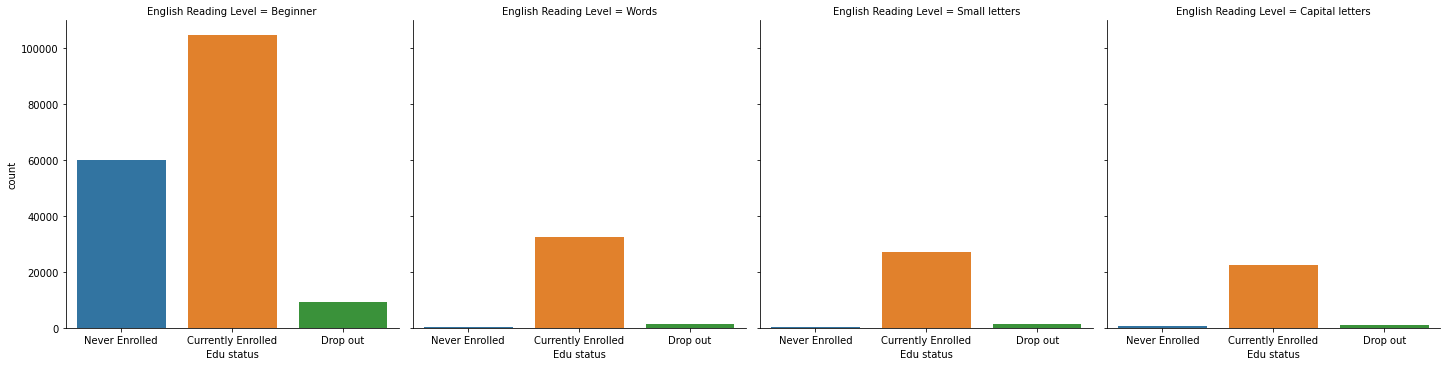

In [26]:
g = sns.catplot('Edu status', col = 'English Reading Level',
                data=data[data['English Reading Level'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

Text(0.5, 0.98, 'sf')

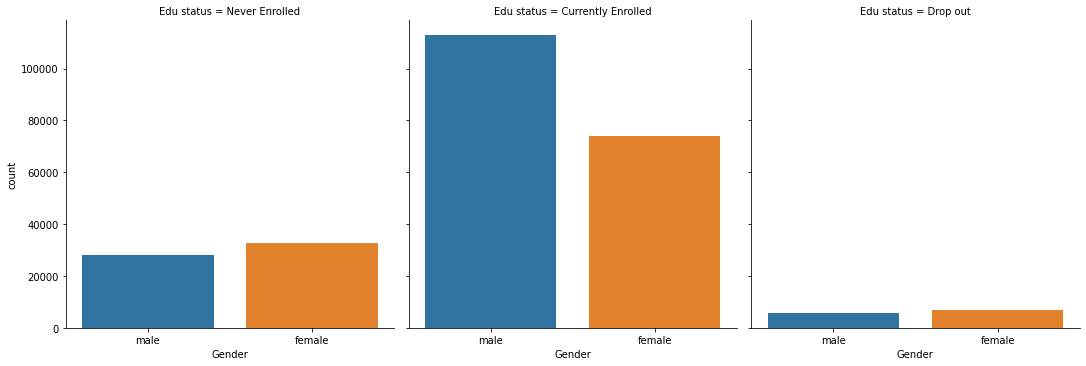

In [27]:
g = sns.catplot('Gender', col = 'Edu status',
                data=data[data['Edu status'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

Text(0.5, 0.98, 'sf')

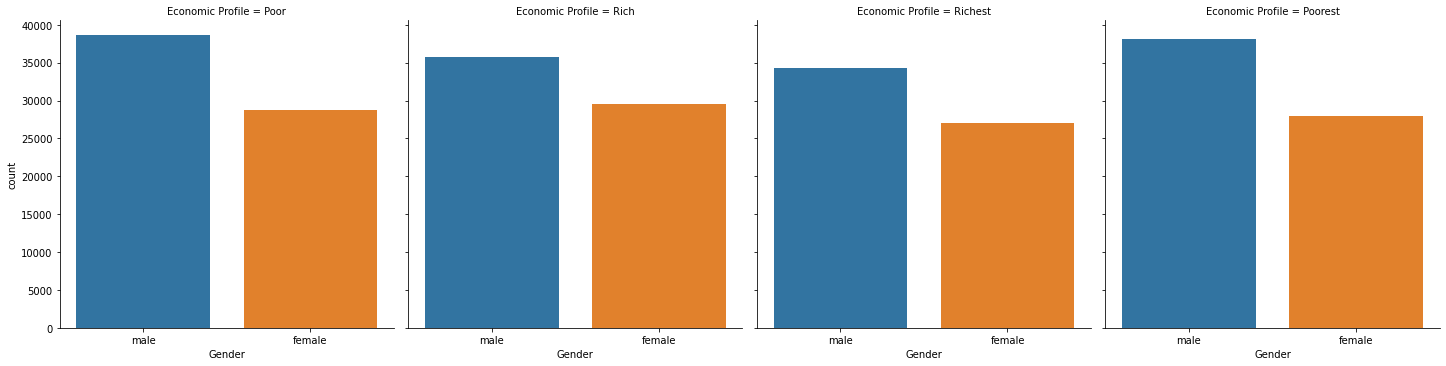

In [28]:
g = sns.catplot('Gender', col = 'Economic Profile',
                data=data[data['Economic Profile'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

Text(0.5, 0.98, 'sf')

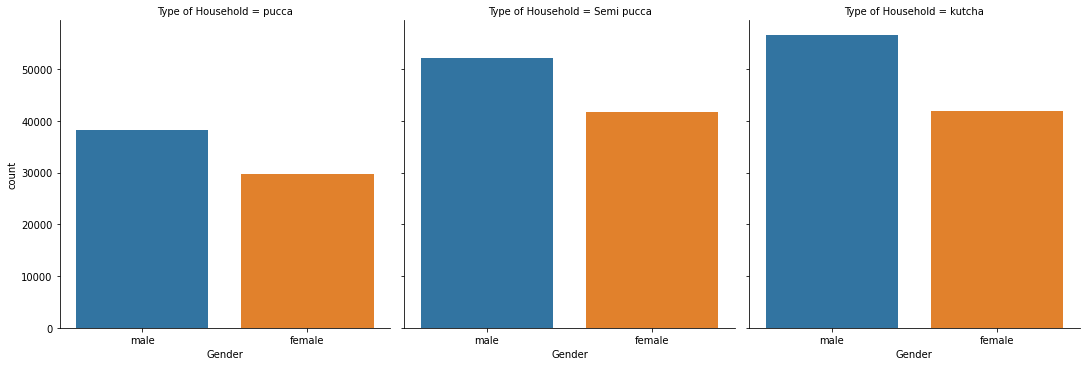

In [29]:
g = sns.catplot('Gender', col = 'Type of Household',
                data=data[data['Type of Household'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

Text(0.5, 0.98, 'sf')

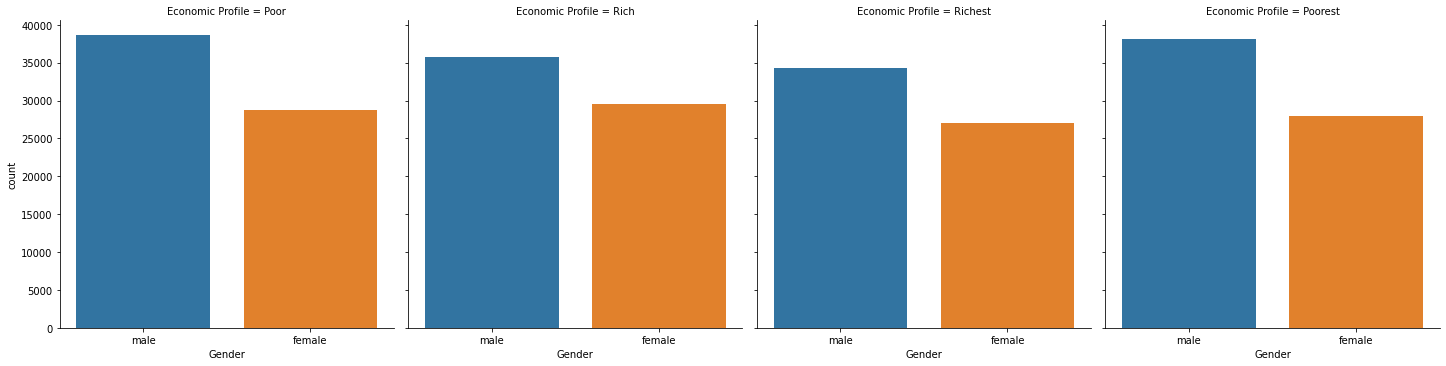

In [30]:
g = sns.catplot('Gender', col = 'Economic Profile',
                data=data[data['Economic Profile'].notnull()], kind="count", dodge = False)
fig.suptitle('sf')

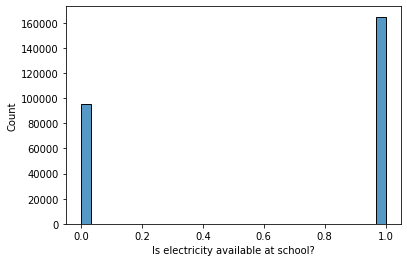

In [31]:
sns.histplot(data['Is electricity available at school?'])

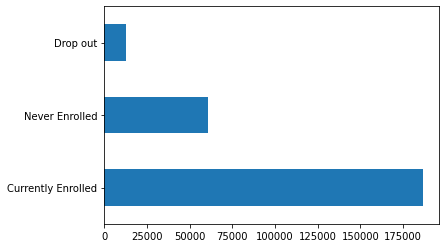

In [32]:
data['Edu status'].value_counts().plot(kind='barh')

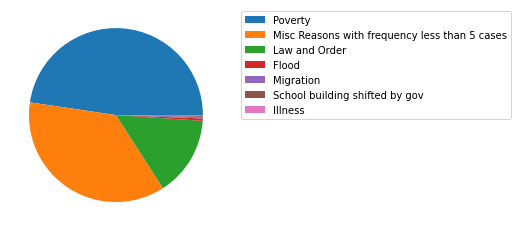

In [33]:
#####################MAKE BIGGER IF YOU HAVE TIME LATER#####################
plt = data[data['Edu status'] == 'Drop out']
#plt['Reasons for dropout'].value_counts().plot(kind='pie', subplots=True, figsize=(15,10))
#plt['Reasons for dropout'].value_counts().plot.pie(subplots=True)
labels = ['Poverty', 'Misc Reasons with frequency less than 5 cases' ,'Law and Order', 'Flood', 'Migration', 'School building shifted by gov', 'Illness']
pyplt.pie(plt['Reasons for dropout'].value_counts())
pyplt.legend(labels=labels,  bbox_to_anchor=(1.05, 1), loc='upper left')
pyplt.show()

In [34]:
plt['Reasons for dropout'].value_counts()

Poverty                                          6006
Misc Reasons with frequency less than 5 cases    4593
Law and Order                                    1871
Flood                                              55
Migration                                          36
School building shifted by gov                     35
Illness                                             7
Name: Reasons for dropout, dtype: int64

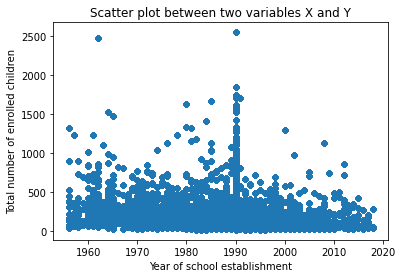

In [35]:
import matplotlib.pyplot as plt
data.plot.scatter(x='Year of school establishment', y='Total number of enrolled children', title= "Scatter plot between two variables X and Y")

<class 'pandas.core.frame.DataFrame'>


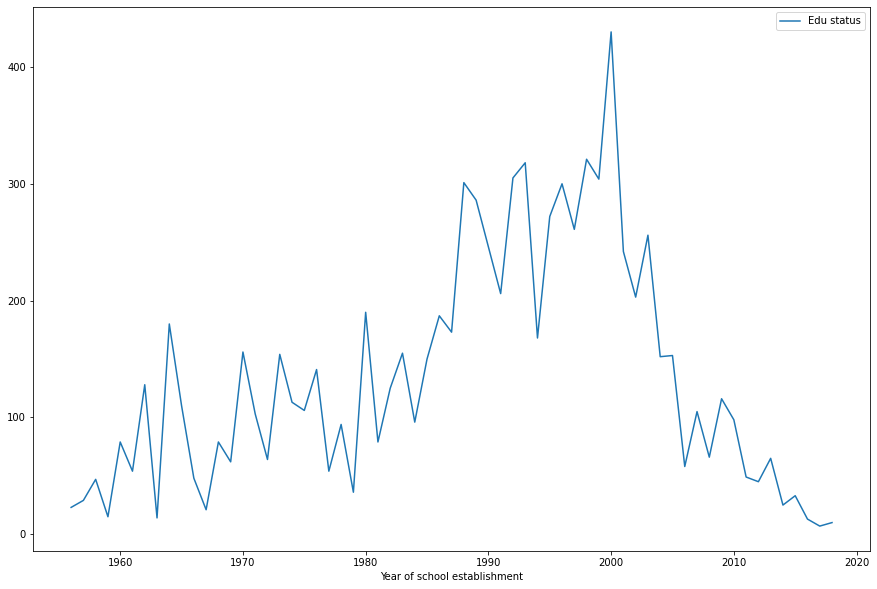

In [36]:
import matplotlib.pyplot as plt
#distInfo = data[['Edu status', 'Year of school establishment']].groupby(['Edu status']).count()
#display(distInfo)
data['Year of school establishment'].replace(to_replace=1990,value=np.nan,inplace=True)
numDrop = data[data['Edu status'] == 'Drop out']
distInfo = numDrop[['Edu status', 'Year of school establishment']].groupby(['Year of school establishment']).count()
print(type(distInfo))
#display(distInfo)
#numEnroll = data[data['Edu status'] == 'Currently Enrolled']
#numDrop['Year of school establishment'].groupby(1956.0).count()
distInfo.plot(kind='line',figsize=(15,10))

#data.plot.scatter(x='Year of school establishment', y = 'Edu status', title= "Scatter plot between two variables X and Y")
#numDrop.plot.scatter(x='Year of school establishment', y='Total number of enrolled children', title= "Scatter plot between two variables X and Y")

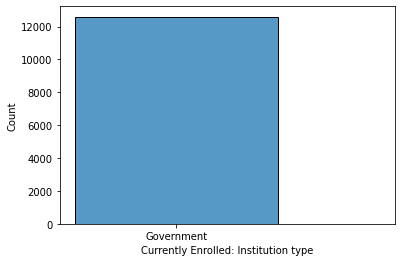

In [37]:
plt = data[data['Edu status'] == 'Drop out']
#plt['Currently Enrolled: Institution type'].value_counts()
sns.histplot(plt['Currently Enrolled: Institution type'])